In [1]:
import pandas as pd
from load_and_preprocess import load_data_batch
import h3
import matplotlib.pyplot as plt
import h3pandas
import geopandas
import shapely

In [3]:
data = load_data_batch(["Frankfurt_LH_2302.h5"], sample_fraction=0.01)

['LH_220201', 'LH_220202', 'LH_220203', 'LH_220204', 'LH_220205', 'LH_220206', 'LH_220207', 'LH_220208', 'LH_220209', 'LH_220210', 'LH_220211', 'LH_220212', 'LH_220213', 'LH_220214', 'LH_220215', 'LH_220216', 'LH_220217', 'LH_220218', 'LH_220219', 'LH_220220', 'LH_220221', 'LH_220222', 'LH_220227', 'LH_220228']


Frankfurt_LH_2302.h5:   0%|          | 0/24 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [29]:
dfh3 = data.h3.geo_to_h3(2, lat_col="latitude", lng_col = "longitude")

In [30]:
dfh3["hexagon"] = dfh3.index

In [31]:
dfh3 = dfh3.groupby('h3_02').count()

In [32]:
gdfh3 = dfh3.h3.h3_to_geo_boundary()
gdfh3.head()

,distance,altitude,geoaltitude,arrival_time,timestamp,vertical_rate,groundspeed,track,latitude,longitude,hexagon,geometry
h3_02,,,,,,,,,,,,
82062ffffffffff,304,304,304,304,304,304,304,304,304,304,304,"POLYGON ((-23.60158 67.97841, -27.10886 68.852..."
820747fffffffff,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,"POLYGON ((-14.94239 65.10982, -17.54611 66.095..."
82074ffffffffff,459,459,459,459,459,459,459,459,459,459,459,"POLYGON ((-18.74171 62.92040, -21.32794 63.819..."
820757fffffffff,406,406,406,406,406,406,406,406,406,406,406,"POLYGON ((-16.82506 67.68784, -19.87138 68.678..."
82075ffffffffff,2071,2071,2071,2071,2071,2071,2071,2071,2071,2071,2071,"POLYGON ((-20.90437 65.43481, -23.89271 66.331..."


<Axes: >

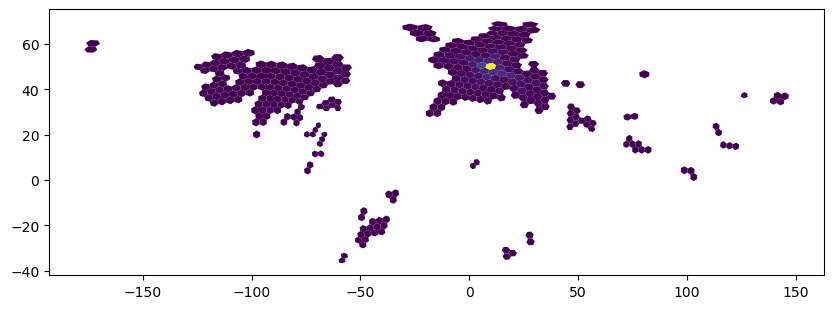

In [33]:
gdfh3.plot(column='hexagon', figsize=(10, 10))


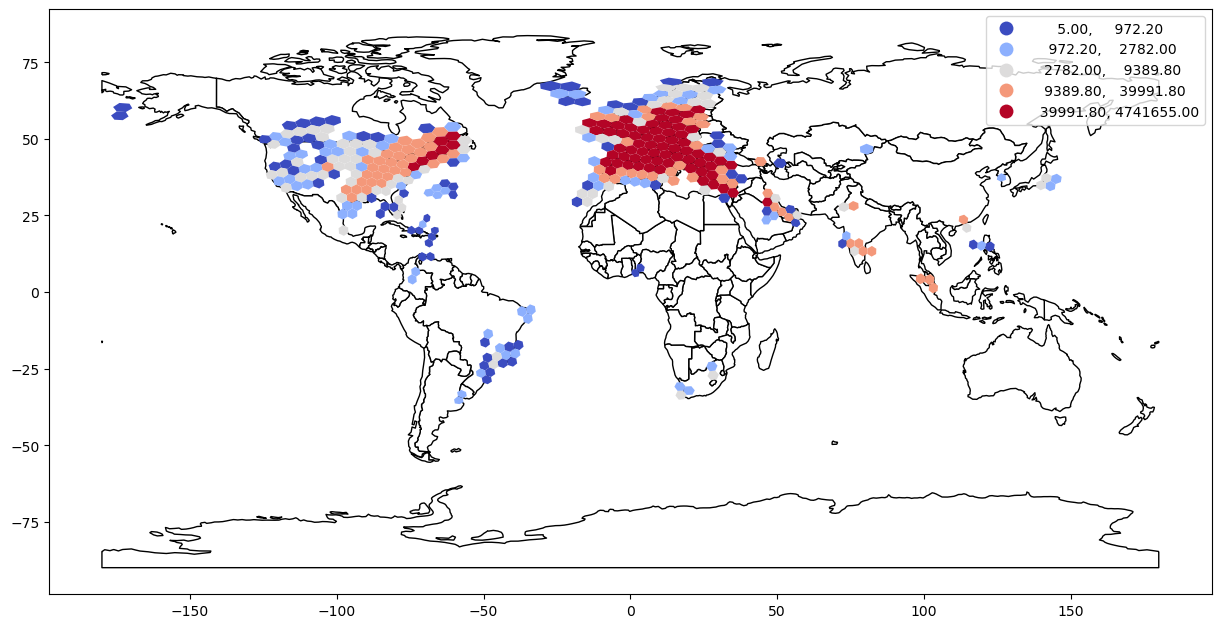

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame from your DataFrame
# Assuming df is your dataframe, and it has 'geometry' and 'count' columns
gdf = gpd.GeoDataFrame(gdfh3, geometry='geometry')

# Create a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a figure and axis with matplotlib
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color='white', edgecolor='black')

# Plot the hexagons
gdf.plot(column='hexagon', ax=ax, legend=True, cmap='coolwarm', scheme='quantiles')

# Show the plot
plt.show()


In [49]:
from folium.plugins import HeatMap

# Create a Map instance
m = folium.Map(location=[data["latitude"].mean(), data["longitude"].mean()], zoom_start=2, control_scale=True)

# Add heatmap to map instance
HeatMap(data=data[['latitude', 'longitude']].values.tolist()).add_to(m)

# Alternative syntax:
# HeatMap(data=data[['latitude', 'longitude']].values).add_to(m)

# Display the map
m.save("heatmap.html")


In [41]:
ys

array([[10751325.68849386, 10751325.68849386, 10751325.68849386, ...,
        10751325.68849386, 10751325.68849386, 10751325.68849386],
       [11006736.70670663, 11006736.70670663, 11006736.70670663, ...,
        11006736.70670663, 11006736.70670663, 11006736.70670663],
       [11258668.29026312, 11258668.29026312, 11258668.29026312, ...,
        11258668.29026312, 11258668.29026312, 11258668.29026312],
       ...,
       [22778219.93042998, 22778219.93042998, 22778219.93042998, ...,
        22778219.93042998, 22778219.93042998, 22778219.93042998],
       [23142585.99274739, 23142585.99274739, 23142585.99274739, ...,
        23142585.99274739, 23142585.99274739, 23142585.99274739],
       [23520563.0280254 , 23520563.0280254 , 23520563.0280254 , ...,
        23520563.0280254 , 23520563.0280254 , 23520563.0280254 ]])

In [3]:
import numpy as np
int(np.ceil(9.2))

10